# Task

# 01 Importing Libraries

In [4]:
# Importing Analysis Libraries
import pandas as pd
import numpy as np
import os

In [5]:
# Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Dataframes

## Creating Path

In [8]:
# Creating a path for prepared data
path = r'/Users/Andreas/Desktop/13-02-2025 Instacart Basket Analysis/02 Data/Prepared Data'

In [9]:
# Testing output
path

'/Users/Andreas/Desktop/13-02-2025 Instacart Basket Analysis/02 Data/Prepared Data'

## Importing dataframe

In [11]:
# Import customers_orders_products.pkl as df
df_c_o_p = pd.read_pickle(os.path.join(path, 'customers_orders_products.pkl'))

In [12]:
# Checking output
df_c_o_p.head(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,-44,both
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,-44,both
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,94,both
3,1,Chocolate Sandwich Cookies,61,19,5.800781,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,76,both
4,1,Chocolate Sandwich Cookies,61,19,5.800781,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,76,both
5,1,Chocolate Sandwich Cookies,61,19,5.800781,1701441,777,16,1,7,...,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,-59,both
6,1,Chocolate Sandwich Cookies,61,19,5.800781,1871483,825,3,2,14,...,nan,Parks,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,123,both
7,1,Chocolate Sandwich Cookies,61,19,5.800781,1290456,910,12,3,10,...,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,56,both
8,1,Chocolate Sandwich Cookies,61,19,5.800781,369558,1052,10,1,20,...,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,-13,both
9,1,Chocolate Sandwich Cookies,61,19,5.800781,589712,1052,15,1,12,...,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,-13,both


In [13]:
# Checking columns and datatypes
df_c_o_p.dtypes

product_id                  int32
product_name               object
aisle_id                    int16
department_id               int16
prices                    float64
order_id                   object
user_id                    object
order_number                int16
orders_day_of_week          int16
order_hour_of_day           int16
days_without_ordering     float16
add_to_cart_order           int16
reordered                   int16
price_label                object
busiest_days               object
busiest_period_of_day      object
max_order                   int16
loyalty_flag               object
user_mean_price           float64
Spender_habit              object
median_days_no_order      float16
customer_type              object
first_name                 object
surname                    object
gender                     object
state                      object
age                          int8
date_joined                object
number_of_dependants         int8
marital_status

# 03 PII Adherence

## PII Issues

'first_name' and 'surname' are identifier columns that can pinpoint certain individual especially when used with columns 'state', 'income', 'gender', 'marital_status', 'age' and 'number_of_dependents'

This customer information was created by Careerfoundry as a means to practice and execute tasks for this course. This information is totally random. However, for practice purposes first I would contact client and speak with my senior colleagues to make sure that the data that we have recieved from client is in line with GDPR or CCPA rules and regulations

I will remove 'first_name' and 'surname' from my analysis data, not the original as we have the 'user_id' as a unique identifier the names don't add anything to our analysis and create an issue with PII compliance.

## Removing Columns to adhere to PII Compliance

In [17]:
# Removal of 'first_name' and 'surname' columns
df_c_o_p = df_c_o_p.drop(columns = ['first_name', 'surname'])

In [18]:
# Checking Columns removed successfully
df_c_o_p.dtypes

product_id                  int32
product_name               object
aisle_id                    int16
department_id               int16
prices                    float64
order_id                   object
user_id                    object
order_number                int16
orders_day_of_week          int16
order_hour_of_day           int16
days_without_ordering     float16
add_to_cart_order           int16
reordered                   int16
price_label                object
busiest_days               object
busiest_period_of_day      object
max_order                   int16
loyalty_flag               object
user_mean_price           float64
Spender_habit              object
median_days_no_order      float16
customer_type              object
gender                     object
state                      object
age                          int8
date_joined                object
number_of_dependants         int8
marital_status             object
income                       int8
_merge        

'first_name' and 'surname' columns removed successfully

# 04 Creating Region inplace of State

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

## Finding which States are present in Dataframe

In [22]:
# Find each unique state present in dataframe
df_c_o_p['state'].value_counts(dropna = False)

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

## Renaming States that in Northeast Region as NE


In [24]:
# Renaming states in the state columns present in Northeast region as NE
df_c_o_p['state'] = df_c_o_p['state'].replace('Maine', 'NE')
df_c_o_p['state'] = df_c_o_p['state'].replace('New Hampshire', 'NE')
df_c_o_p['state'] = df_c_o_p['state'].replace('Vermont', 'NE')
df_c_o_p['state'] = df_c_o_p['state'].replace('Massachusetts', 'NE')
df_c_o_p['state'] = df_c_o_p['state'].replace('Rhode Island', 'NE')
df_c_o_p['state'] = df_c_o_p['state'].replace('Connecticut', 'NE')
df_c_o_p['state'] = df_c_o_p['state'].replace('New York', 'NE')
df_c_o_p['state'] = df_c_o_p['state'].replace('Pennsylvania', 'NE')
df_c_o_p['state'] = df_c_o_p['state'].replace('New Jersey', 'NE')

In [25]:
# Checking Output
df_c_o_p['state'].value_counts(dropna = False)

state
NE                      5722736
California               659783
Georgia                  656389
New Mexico               654494
Arizona                  653964
North Carolina           651900
Oklahoma                 651739
Alaska                   648495
Minnesota                647825
Wyoming                  644255
Virginia                 641421
Missouri                 640732
Texas                    640394
Colorado                 639280
North Dakota             638491
Alabama                  638003
Kansas                   637538
Louisiana                637482
Delaware                 637024
South Carolina           636754
Oregon                   636425
Arkansas                 636144
Nevada                   636139
Montana                  635265
South Dakota             633772
Illinois                 633024
Hawaii                   632901
Washington               632852
Mississippi              632675
Kentucky                 632490
Michigan                 630928
Fl

All the states in above code have been successfully changed to NE

## Renaming States in Midwest Region as MW

In [28]:
# Renaming states within the state column that are in MidWest region as MW
df_c_o_p['state'] = df_c_o_p['state'].replace('Wisconsin', 'MW')
df_c_o_p['state'] = df_c_o_p['state'].replace('Michigan', 'MW')
df_c_o_p['state'] = df_c_o_p['state'].replace('Illinois', 'MW')
df_c_o_p['state'] = df_c_o_p['state'].replace('Indiana', 'MW')
df_c_o_p['state'] = df_c_o_p['state'].replace('Ohio', 'MW')
df_c_o_p['state'] = df_c_o_p['state'].replace('North Dakota', 'MW')
df_c_o_p['state'] = df_c_o_p['state'].replace('South Dakota', 'MW')
df_c_o_p['state'] = df_c_o_p['state'].replace('Nebraska', 'MW')
df_c_o_p['state'] = df_c_o_p['state'].replace('Kansas', 'MW')
df_c_o_p['state'] = df_c_o_p['state'].replace('Minnesota', 'MW')
df_c_o_p['state'] = df_c_o_p['state'].replace('Iowa', 'MW')
df_c_o_p['state'] = df_c_o_p['state'].replace('Missouri', 'MW')

In [29]:
# Checking output
df_c_o_p['state'].value_counts(dropna = False)

state
MW                      7597325
NE                      5722736
California               659783
Georgia                  656389
New Mexico               654494
Arizona                  653964
North Carolina           651900
Oklahoma                 651739
Alaska                   648495
Wyoming                  644255
Virginia                 641421
Texas                    640394
Colorado                 639280
Alabama                  638003
Louisiana                637482
Delaware                 637024
South Carolina           636754
Oregon                   636425
Arkansas                 636144
Nevada                   636139
Montana                  635265
Hawaii                   632901
Washington               632852
Mississippi              632675
Kentucky                 632490
Florida                  629027
Maryland                 626579
Tennessee                617873
District of Columbia     613695
West Virginia            612296
Utah                     611941
Id

All states in above code have been successfully changed to MW

## Renaming States in South Region as S

In [32]:
# Renaming states within the state column in the South Region as S
df_c_o_p['state'] = df_c_o_p['state'].replace('Delaware', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('Maryland', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('District of Columbia', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('Virginia', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('West Virginia', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('North Carolina', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('South Carolina', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('Georgia', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('Florida', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('Kentucky', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('Tennessee', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('Mississippi', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('Alabama', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('Oklahoma', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('Texas', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('Arkansas', 'S')
df_c_o_p['state'] = df_c_o_p['state'].replace('Louisiana', 'S')

In [33]:
# Checking output
df_c_o_p['state'].value_counts(dropna = False)

state
S             10791885
MW             7597325
NE             5722736
California      659783
New Mexico      654494
Arizona         653964
Alaska          648495
Wyoming         644255
Colorado        639280
Oregon          636425
Nevada          636139
Montana         635265
Hawaii          632901
Washington      632852
Utah            611941
Idaho           607119
Name: count, dtype: int64

All states in above code have been successfully changed to S

## Renaming States in West Region as W

In [36]:
# Renaming states in state column that are in the West Region as W
df_c_o_p['state'] = df_c_o_p['state'].replace('Idaho', 'W')
df_c_o_p['state'] = df_c_o_p['state'].replace('Montana', 'W')
df_c_o_p['state'] = df_c_o_p['state'].replace('Wyoming', 'W')
df_c_o_p['state'] = df_c_o_p['state'].replace('Nevada', 'W')
df_c_o_p['state'] = df_c_o_p['state'].replace('Utah', 'W')
df_c_o_p['state'] = df_c_o_p['state'].replace('Colorado', 'W')
df_c_o_p['state'] = df_c_o_p['state'].replace('Arizona', 'W')
df_c_o_p['state'] = df_c_o_p['state'].replace('New Mexico', 'W')
df_c_o_p['state'] = df_c_o_p['state'].replace('Alaska', 'W')
df_c_o_p['state'] = df_c_o_p['state'].replace('Washington', 'W')
df_c_o_p['state'] = df_c_o_p['state'].replace('Oregon', 'W')
df_c_o_p['state'] = df_c_o_p['state'].replace('California', 'W')
df_c_o_p['state'] = df_c_o_p['state'].replace('Hawaii', 'W')

In [37]:
# Checking output
df_c_o_p['state'].value_counts(dropna = False)

state
S     10791885
W      8292913
MW     7597325
NE     5722736
Name: count, dtype: int64

All states in above code have been successfully changed to S

## Renaming State Column as Region

In [40]:
# Changing name of column 'state' to 'region'
df_c_o_p.rename(columns={'state': 'region'}, inplace=True)

In [41]:
# Checking output
df_c_o_p['region'].value_counts(dropna = False)

region
S     10791885
W      8292913
MW     7597325
NE     5722736
Name: count, dtype: int64

'state' column successfully renamed to 'region'

## Spending Habits by Region

In [44]:
# Creating new df called spending_habits containing the average user_mean_price by region
spending_habits = df_c_o_p.groupby('region').agg({'user_mean_price': 'mean'})

In [45]:
# Checking Output
spending_habits

,user_mean_price
region,
MW,9.832522
NE,9.702281
S,9.924853
W,9.775830


Observation:

When Regions are grouped by the Average 'user_mean_price' we can see the order from highest to lowest being S > MW > W > NE. 

# 05 Excluding Flag

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

## Create Dataframe with Count of Orders per User ID

In [50]:
# Create new dataframe with count of orders per user_id
order_counts = df_c_o_p.groupby('user_id')['order_id'].count().reset_index()

In [51]:
# Checking output
order_counts

,user_id,order_id
0,1,59
1,10,143
2,100,27
3,1000,103
4,10000,1092
...,...,...
206204,99995,50
206205,99996,128
206206,99997,36
206207,99998,21


In [52]:
# Rename column created in new dataframe from order_id to order_count
order_counts.rename(columns={'order_id': 'order_count'}, inplace=True)

In [53]:
# Checking output
order_counts

,user_id,order_count
0,1,59
1,10,143
2,100,27
3,1000,103
4,10000,1092
...,...,...
206204,99995,50
206205,99996,128
206206,99997,36
206207,99998,21


## Create the Exclusion Flag

In [55]:
# Creating Exclusion flag for customers with under 5 orders
order_counts['low_activity'] = order_counts['order_count'] < 5

In [56]:
# Checking Output
order_counts['low_activity'].value_counts(dropna = False)

low_activity
False    205410
True        799
Name: count, dtype: int64

In [57]:
# Creating Dataframe to use as filter contating only low_activity and user_id from order_counts dataframe
low_activity_users = order_counts[order_counts['low_activity']]['user_id']

In [58]:
# Checking output
low_activity_users

170        10015
675       100604
1014       10091
1084      100973
1486      101334
           ...  
205154     99049
205427     99295
205495     99356
205845     99671
205948     99764
Name: user_id, Length: 799, dtype: object

Length matches with the True count of our Exclusion Flag so it is correct

In [60]:
# Filtering df_c_o_p with our Exclusion Flag to create new dataframe
filtered_df = df_c_o_p[~df_c_o_p['user_id'].isin(low_activity_users)]

 the '~' being used on boolean (our exclusion flag) turns all false statements as true, and all the true statements as false this will allow us to keep all the true which in this case are customers with 5 or more orders

In [201]:
filtered_df.shape

(32401975, 30)

## Export Filtered Dataframe

In [63]:
filtered_df.to_csv(os.path.join(path, 'customers_orders_products_filtered'))

# 06 Creating Customer Profiles

## Creating and Applying Function

In [122]:
# Create a function to assign customer profiles
def assign_profile(row):
    if row['number_of_dependants'] == 0 and 18 <= row['age'] <= 81:
        return 'Single Adult'
    elif 18 <= row['age'] <= 30 and 1 <= row['number_of_dependants'] <= 3:
        return 'Young Parent'
    elif 31 <= row['age'] <= 50 and 1 <= row['number_of_dependants'] <= 3:
        return 'Average Parent'
    elif 51 <= row['age'] <= 81 and 1<= row['number_of_dependants'] <= 3:
        return 'Old Parent'
    elif row['income'] < 40000:
        return 'Budget Shopper'
    else:
        return 'Average Shopper'
    

In [124]:
# Applying created function to create a new column with customer profile
df_c_o_p['customer_profile'] = df_c_o_p.apply(assign_profile, axis=1)

In [126]:
# Output Check
df_c_o_p['customer_profile'].value_counts(dropna = False)

customer_profile
Old Parent        11704949
Single Adult       8097503
Average Parent     7647337
Young Parent       4955070
Name: count, dtype: int64

## Visualization Creation

In [128]:
# Creating dataframe for the count of each customer profile
profile_counts = df_c_o_p['customer_profile'].value_counts()

In [130]:
# Checking output
profile_counts

customer_profile
Old Parent        11704949
Single Adult       8097503
Average Parent     7647337
Young Parent       4955070
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Old Parent'),
  Text(1, 0, 'Single Adult'),
  Text(2, 0, 'Average Parent'),
  Text(3, 0, 'Young Parent')])

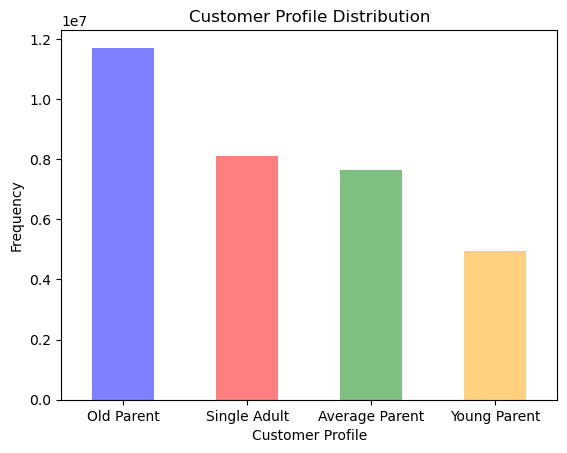

In [231]:
# Creating Bar for profile counts
bar = profile_counts.plot.bar(color=['blue', 'red', 'green', 'orange', 'purple'], alpha=0.5)

# Creating Labels
plt.title('Customer Profile Distribution')
plt.xlabel('Customer Profile')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  

## Exoprt Bar Graph

## Creathing path for Visualization

In [134]:
# Creating Path
path2 = r'/Users/Andreas/Desktop/13-02-2025 Instacart Basket Analysis/04 Analysis/Visualizations'

In [136]:
# Testing Path
path2

'/Users/Andreas/Desktop/13-02-2025 Instacart Basket Analysis/04 Analysis/Visualizations'

In [233]:
bar.figure.savefig(os.path.join(path2, 'bar_customer_profile_distribution.png'))

# 07 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [89]:
# Calculate total expenditure by order_id
total_expenditure_per_order = df_c_o_p.groupby('order_id')['prices'].sum().reset_index()
total_expenditure_per_order.rename(columns={'prices': 'total_expenditure'}, inplace=True)

In [93]:
# Checking output
total_expenditure_per_order

,order_id,total_expenditure
0,10,132.796875
1,100,11.000000
2,1000,33.602539
3,10000,125.695312
4,1000000,35.093750
...,...,...
3214680,999995,12.101562
3214681,999996,62.996094
3214682,999997,127.700195
3214683,999998,115.507812


In [95]:
# Count the number of orders by user_id (usage frequency)
usage_frequency_per_user = df_c_o_p.groupby('user_id')['order_id'].count().reset_index()
usage_frequency_per_user.rename(columns={'order_id': 'usage_frequency'}, inplace=True)

In [97]:
# Check output
usage_frequency_per_user

,user_id,usage_frequency
0,1,59
1,10,143
2,100,27
3,1000,103
4,10000,1092
...,...,...
206204,99995,50
206205,99996,128
206206,99997,36
206207,99998,21


In [99]:
# Create a DataFrame that includes user_id and total expenditure
order_user_data = df_c_o_p[['order_id', 'user_id', 'customer_profile']].drop_duplicates()

In [101]:
# Merge total expenditure with order_user_data
order_data = pd.merge(total_expenditure_per_order, order_user_data, on='order_id')

In [103]:
# Merge with usage frequency
final_data = pd.merge(order_data, usage_frequency_per_user, on='user_id')

In [105]:
#Group by customer profile and aggregate

aggregated_data = final_data.groupby('customer_profile').agg(
    max_usage_frequency=('usage_frequency', 'max'),
    mean_usage_frequency=('usage_frequency', 'mean'),
    min_usage_frequency=('usage_frequency', 'min'),
    max_expenditure=('total_expenditure', 'max'),
    mean_expenditure=('total_expenditure', 'mean'),
    min_expenditure=('total_expenditure', 'min')
).reset_index()

In [107]:
aggregated_data

,customer_profile,max_usage_frequency,mean_usage_frequency,min_usage_frequency,max_expenditure,mean_expenditure,min_expenditure
0,Average Parent,2901,533.895169,3,15269.796875,144.618146,1.099609
1,Budget Shopper,2901,336.230991,3,15656.998047,100.588298,0.000000
2,Old Parent,3704,328.799632,2,15352.808594,98.606090,0.000000
3,Single Adult,3637,334.852596,1,15467.901367,97.377919,0.000000
4,Young Parent,2577,518.561660,6,15231.103516,143.090452,1.099609


In [109]:
aggregated_data.to_clipboard()

# 08 Customer Profile with Region and Department

In [140]:
# Group by customer profile, region, and department_id, and count occurrences
grouped_data = df_c_o_p.groupby(['customer_profile', 'region', 'department_id']).size().reset_index(name='count')

In [142]:
grouped_data.value_counts(dropna = False)

customer_profile  region  department_id  count 
Average Parent    MW      1              125213    1
Single Adult      S       12             57768     1
                          20             89326     1
                          19             244359    1
                          18             36345     1
                                                  ..
Old Parent        NE      6              16667     1
                          5              8646      1
                          4              607383    1
                          3              76755     1
Young Parent      W       21             2810      1
Name: count, Length: 336, dtype: int64

In [149]:
grouped_data.to_clipboard()

## Bar Graph for Customer Profile by region

In [166]:
# Creating Crosstab
customer_region_cross = pd.crosstab(df_c_o_p['customer_profile'], df_c_o_p['region'], dropna = False)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Average Parent'),
  Text(1, 0, 'Old Parent'),
  Text(2, 0, 'Single Adult'),
  Text(3, 0, 'Young Parent')])

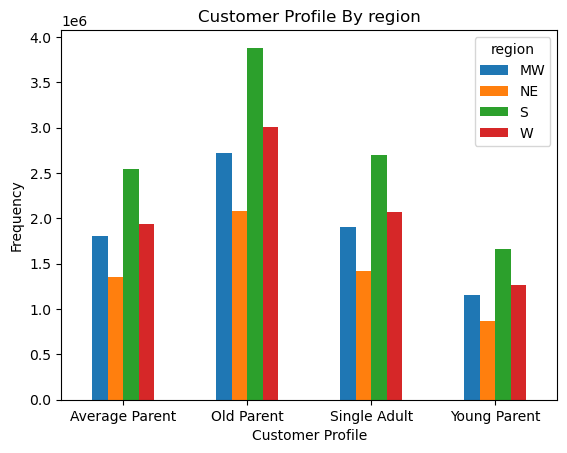

In [227]:
# Creating Bar 
bar2 = customer_region_cross.plot.bar()

# Labelling axis
plt.title('Customer Profile By region')
plt.xlabel('Customer Profile')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  

## Bar Graph Profile by Department

In [175]:
# Creating Crosstab
department_customer_cross = pd.crosstab(df_c_o_p['customer_profile'], df_c_o_p['department_id'], dropna = False)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Average Parent'),
  Text(1, 0, 'Old Parent'),
  Text(2, 0, 'Single Adult'),
  Text(3, 0, 'Young Parent')])

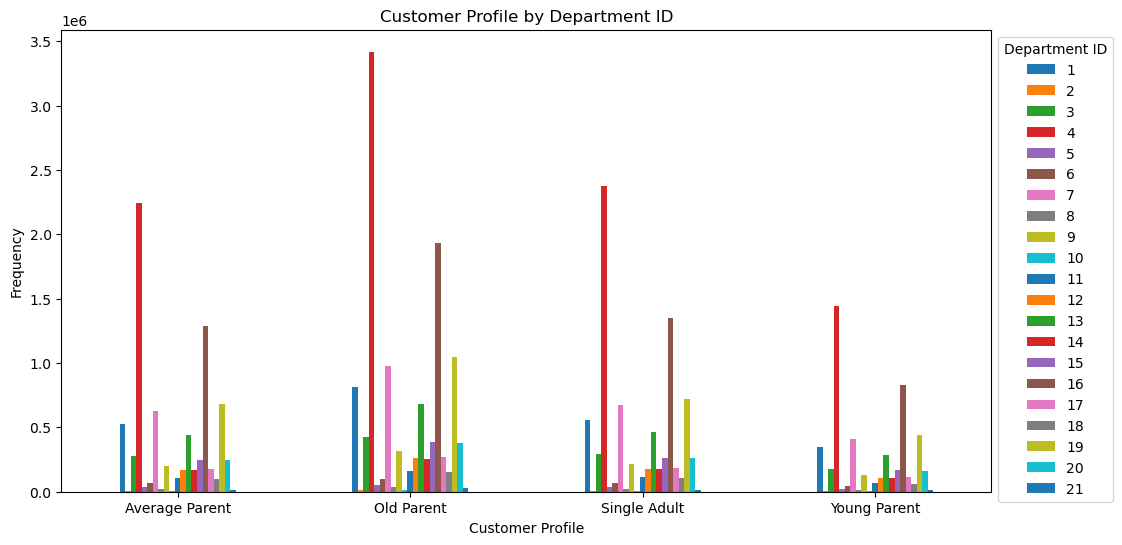

In [223]:
# Create Bar Graph
bar3 = department_customer_cross.plot.bar(figsize=(12, 6))

# Fixing legend to left of graph
plt.legend(title='Department ID', loc='upper left', bbox_to_anchor=(1, 1))

# Labelling Axis
plt.title('Customer Profile by Department ID')
plt.xlabel('Customer Profile')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  


## Export Bar Graphs

In [229]:
bar2.figure.savefig(os.path.join(path2, 'bar_customer_profile_by_region.png'))

In [225]:
bar3.figure.savefig(os.path.join(path2, 'bar_customer_profile_by_department_id.png'))

# 09 Export Final Dataset

In [217]:
df_c_o_p.to_pickle(os.path.join(path, 'orders_products_all'))